In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import sklearn

Loading data and retrieving summary statistics

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\gap year\internship -week 3\raw_sales_data - Sheet1.csv')
df

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,1.0,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,No
5,106,Emily Davis,South,3200,7,1400,1.0,Yes
6,107,David Wilson,East,5300,14,2300,1.2,No
7,108,Susan White,West,2900,6,1100,0.8,Yes
8,109,Chris Martin,North,6000,13,2200,1.2,No
9,110,Anna Taylor,South,3100,8,1350,0.9,Yes


In [31]:
df[['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']].mode()

,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index
0,2500,5.0,2000.0,1.2
1,2600,6.0,NaN,NaN
2,2700,8.0,NaN,NaN
3,2900,11.0,NaN,NaN
4,3000,12.0,NaN,NaN
5,3100,NaN,NaN,NaN
6,3200,NaN,NaN,NaN
7,3300,NaN,NaN,NaN
8,4500,NaN,NaN,NaN
9,4700,NaN,NaN,NaN


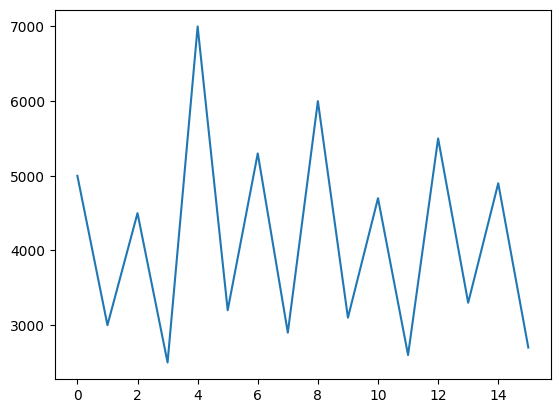

In [16]:
plt.plot(df[['Total_Spend']])

Distribution of purchase frequency and total spend

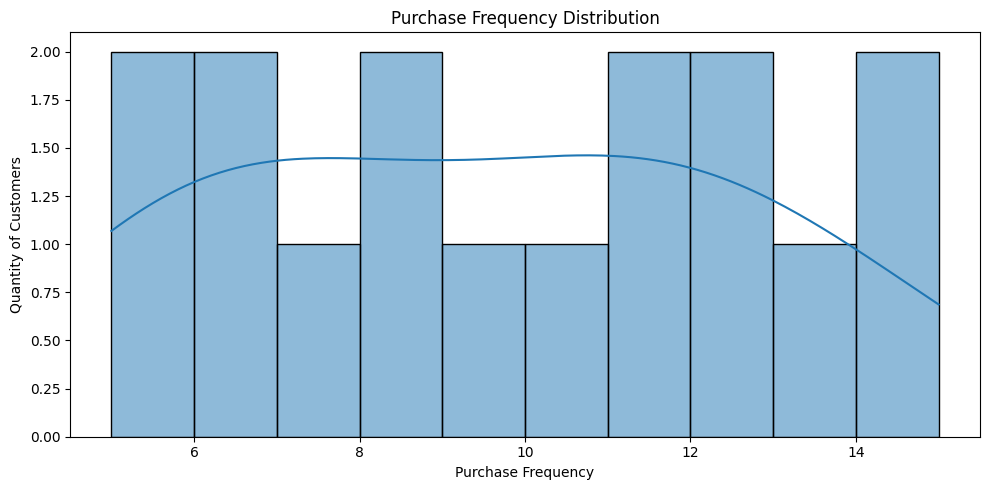

In [47]:
sorted_values = df['Total_Spend'].sort_values().reset_index(drop=True)
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase_Frequency'], bins=10, kde=True)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Quantity of Customers')
plt.tight_layout()
plt.savefig("purch_freq_dist.png")
plt.show()

In [39]:
grouped_dist = df.groupby(['Region'])['Purchase_Frequency'].mean().fillna(0)
# grouped_dist['Total_Spend'].mean()

In [40]:
grouped_dist

Region
East     11.5
North    13.0
South     8.0
West      5.5
Name: Purchase_Frequency, dtype: float64

In [3]:
z_scores = df[['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']].apply(zscore)


In [6]:
z_scores.to_csv('Z_scores.csv')

In [3]:
# Features (independent variables)
X = df[['Marketing_Spend', 'Seasonality_Index']]

# Target (dependent variable)
y = df['Total_Spend']



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -836.9158878504659
Coefficients: [  2.53077667 788.75281985]


In [17]:
y_pred = model.predict(X_test)
print(sklearn.metrics.mean_squared_error(y_pred, y_test.values))

178185.61039034836


In [15]:
y_pred

array([5171.14083145, 3748.00193361, 3494.92426684, 5092.26554947])

In [16]:
y_test

0     5000
1     3000
5     3200
14    4900
Name: Total_Spend, dtype: int64

In [7]:
df['Predicted_Spend'] = model.predict(X)

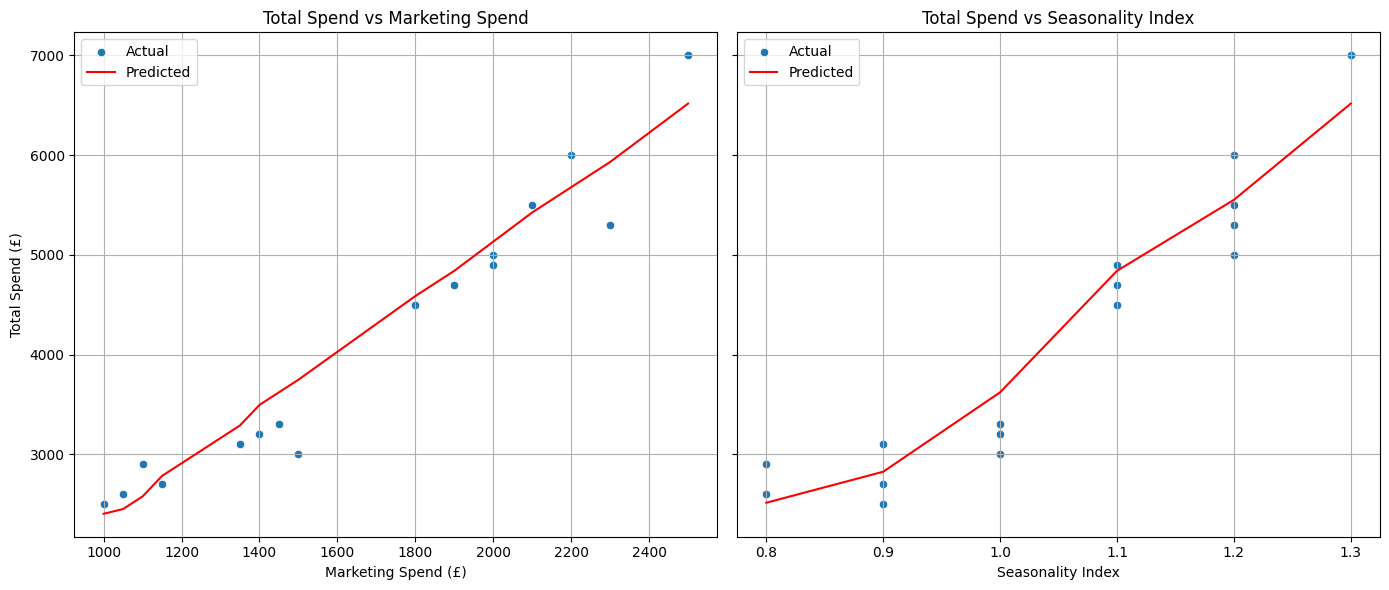

In [10]:
df_sorted_marketing = df.sort_values(by='Marketing_Spend')
df_sorted_seasonality = df.sort_values(by='Seasonality_Index')

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.scatterplot(data=df_sorted_marketing, x='Marketing_Spend', y='Total_Spend', ax=axs[0], label='Actual')
sns.lineplot(data=df_sorted_marketing, x='Marketing_Spend', y='Predicted_Spend', ax=axs[0],
             color='red', label='Predicted', errorbar=None)
axs[0].set_title('Total Spend vs Marketing Spend')
axs[0].set_xlabel('Marketing Spend (£)')
axs[0].set_ylabel('Total Spend (£)')
axs[0].legend()
axs[0].grid(True)

sns.scatterplot(data=df_sorted_seasonality, x='Seasonality_Index', y='Total_Spend', ax=axs[1], label='Actual')
sns.lineplot(data=df_sorted_seasonality, x='Seasonality_Index', y='Predicted_Spend', ax=axs[1],
             color='red', label='Predicted', errorbar=None)
axs[1].set_title('Total Spend vs Seasonality Index')
axs[1].set_xlabel('Seasonality Index')
axs[1].set_ylabel('')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("linear_reg.png")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2524\2099358576.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sorted_df, x='Seasonality_Index', y='Predicted_Spend', color='red', label='Predicted', ci=None)


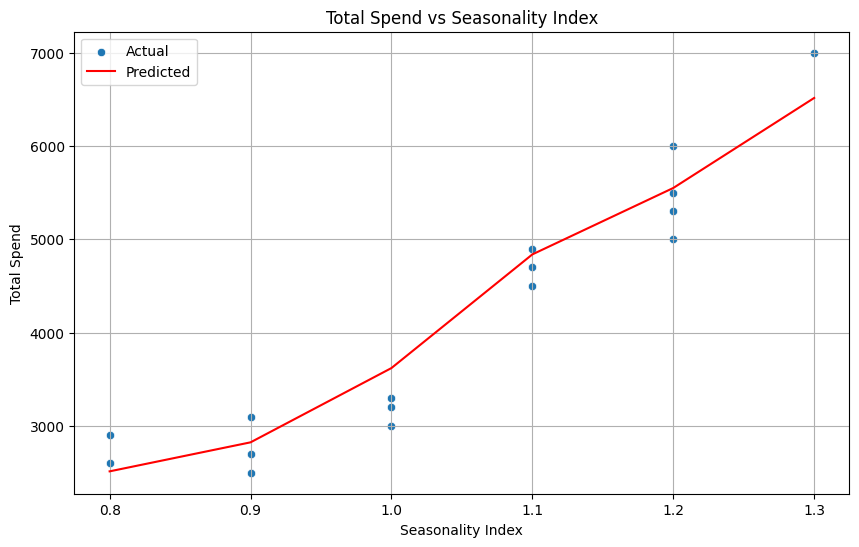

In [19]:
sorted_df = df.sort_values(by='Seasonality_Index')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_df, x='Seasonality_Index', y='Total_Spend', label='Actual')
sns.lineplot(data=sorted_df, x='Seasonality_Index', y='Predicted_Spend', color='red', label='Predicted', ci=None)
plt.title('Total Spend vs Seasonality Index')
plt.ylabel('Total Spend')
plt.xlabel('Seasonality Index')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
df['Churned'] = df['Churned'].replace({'Yes': True, 'No': False})

X = df[['Marketing_Spend', 'Seasonality_Index']]
y = df['Churned'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_11992\656223418.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churned'] = df['Churned'].replace({'Yes': True, 'No': False})


In [4]:
log_model = LogisticRegression()
log_model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
df['Churn_Prob'] = log_model.predict_proba(X)[:, 1]

C:\Users\User\AppData\Local\Temp\ipykernel_11992\382337319.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sorted_marketing, x='Marketing_Spend', y='Churn_Prob', ax=axs[0], color='red', label='Predicted', ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_11992\382337319.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sorted_seasonality, x='Seasonality_Index', y='Churn_Prob', ax=axs[1], color='red', label='Predicted', ci=None)


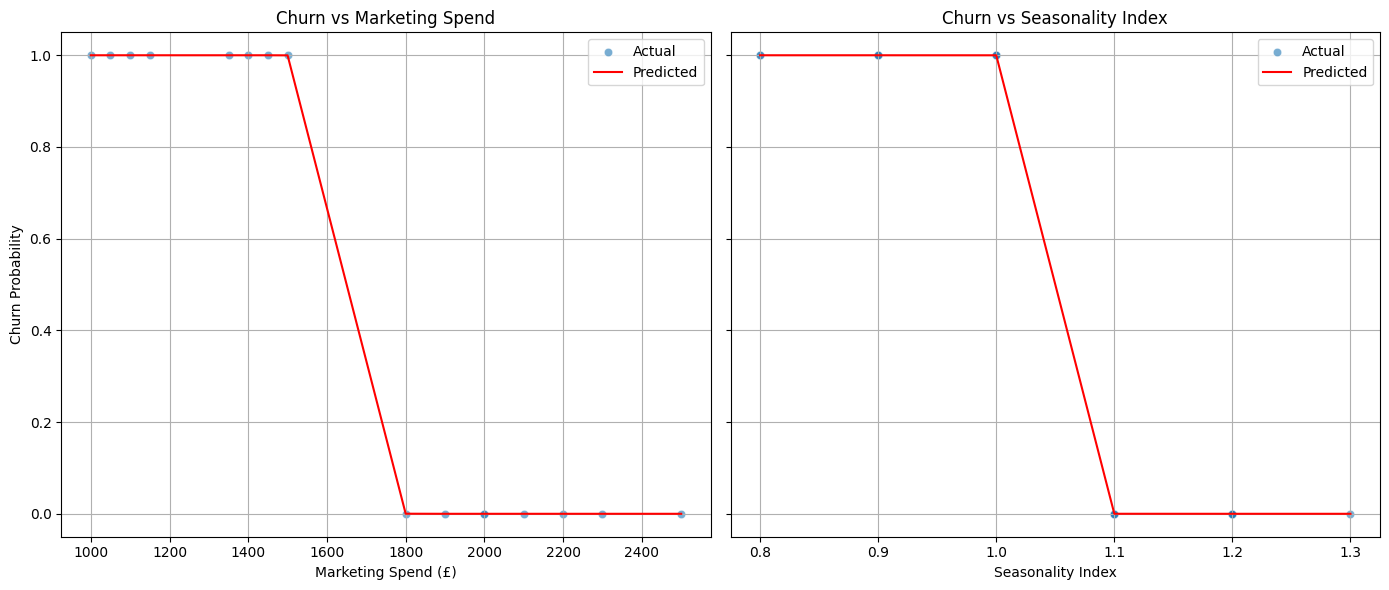

In [6]:
df_sorted_marketing = df.sort_values('Marketing_Spend')
df_sorted_seasonality = df.sort_values('Seasonality_Index')

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.scatterplot(data=df_sorted_marketing, x='Marketing_Spend', y='Churned', ax=axs[0], label='Actual', alpha=0.6)
sns.lineplot(data=df_sorted_marketing, x='Marketing_Spend', y='Churn_Prob', ax=axs[0], color='red', label='Predicted', errorbar=None)
axs[0].set_title('Churn vs Marketing Spend')
axs[0].set_ylabel('Churn Probability')
axs[0].set_xlabel('Marketing Spend (£)')
axs[0].legend()
axs[0].grid(True)

sns.scatterplot(data=df_sorted_seasonality, x='Seasonality_Index', y='Churned', ax=axs[1], label='Actual', alpha=0.6)
sns.lineplot(data=df_sorted_seasonality, x='Seasonality_Index', y='Churn_Prob', ax=axs[1], color='red', label='Predicted', errorbar=None)
axs[1].set_title('Churn vs Seasonality Index')
axs[1].set_ylabel('')
axs[1].set_xlabel('Seasonality Index')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("logic_reg.png")
plt.show()

In [7]:
print("Intercept:", log_model.intercept_)
print("Coefficients:", pd.Series(log_model.coef_[0], index=X.columns))

Intercept: [94.6649352]
Coefficients: Marketing_Spend     -0.057357
Seasonality_Index   -0.000008
dtype: float64


In [21]:
from scipy.stats import f_oneway

region_1 = df[df['Region'] == 'North']['Total_Spend']
region_2 = df[df['Region'] == 'East']['Total_Spend']
region_3 = df[df['Region'] == 'South']['Total_Spend']
region_4 = df[df['Region'] == 'West']['Total_Spend']

anova_result = f_oneway(region_3, region_4)

In [22]:
anova_result

F_onewayResult(statistic=np.float64(19.69090909090909), pvalue=np.float64(0.0043878667784871305))

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

features = ['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency', 'Churned']

df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)
features += [col for col in df_encoded.columns if col.startswith('Region_')]

X = df_encoded[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.decomposition import FactorAnalysis
n_factors = 3

fa = FactorAnalysis(n_components=n_factors, random_state=42)
X_factors = fa.fit_transform(X_scaled)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

loadings = fa.components_.T  # shape (features, n_factors)
loadings_df = pd.DataFrame(loadings, index=features, columns=[f'Factor{i+1}' for i in range(n_factors)])
print(loadings_df)

                     Factor1       Factor2       Factor3
Marketing_Spend    -0.906103  2.638224e-01  3.273251e-01
Seasonality_Index  -0.875761  2.948839e-01  2.912984e-01
Purchase_Frequency -0.880705  2.830693e-01  3.581318e-01
Churned             1.000000  3.787506e-10  9.382978e-11
Region_North       -0.577350 -9.908599e-11  3.845442e-01
Region_South        0.577350  8.164966e-01  2.588366e-11
Region_West         0.577350 -8.164966e-01  8.246170e-11


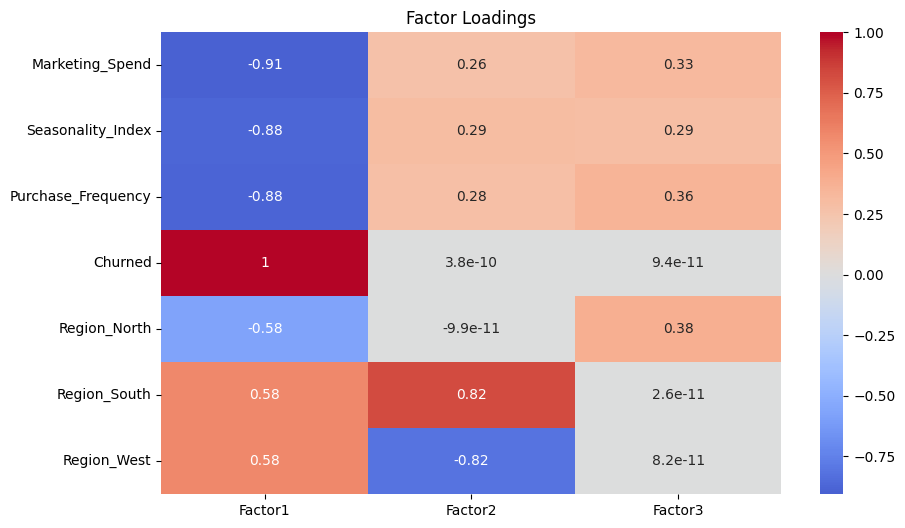

In [28]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.savefig('Factors_Heatmap.png')
plt.show()

In [30]:
features = ['Total_Spend', 'Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency', 'Churned']
X = df[features]

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [33]:
df.loc[X.index, 'Cluster'] = kmeans.labels_

In [34]:
import pandas as pd

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster centers:")
print(centers)

Cluster centers:
   Total_Spend  Marketing_Spend  Seasonality_Index  Purchase_Frequency  \
0       2912.5           1250.0             0.9125            6.750000   
1       5760.0           2220.0             1.2200           13.200000   
2       4700.0           1900.0             1.1000           10.666667   

   Churned  
0      1.0  
1      0.0  
2      0.0  


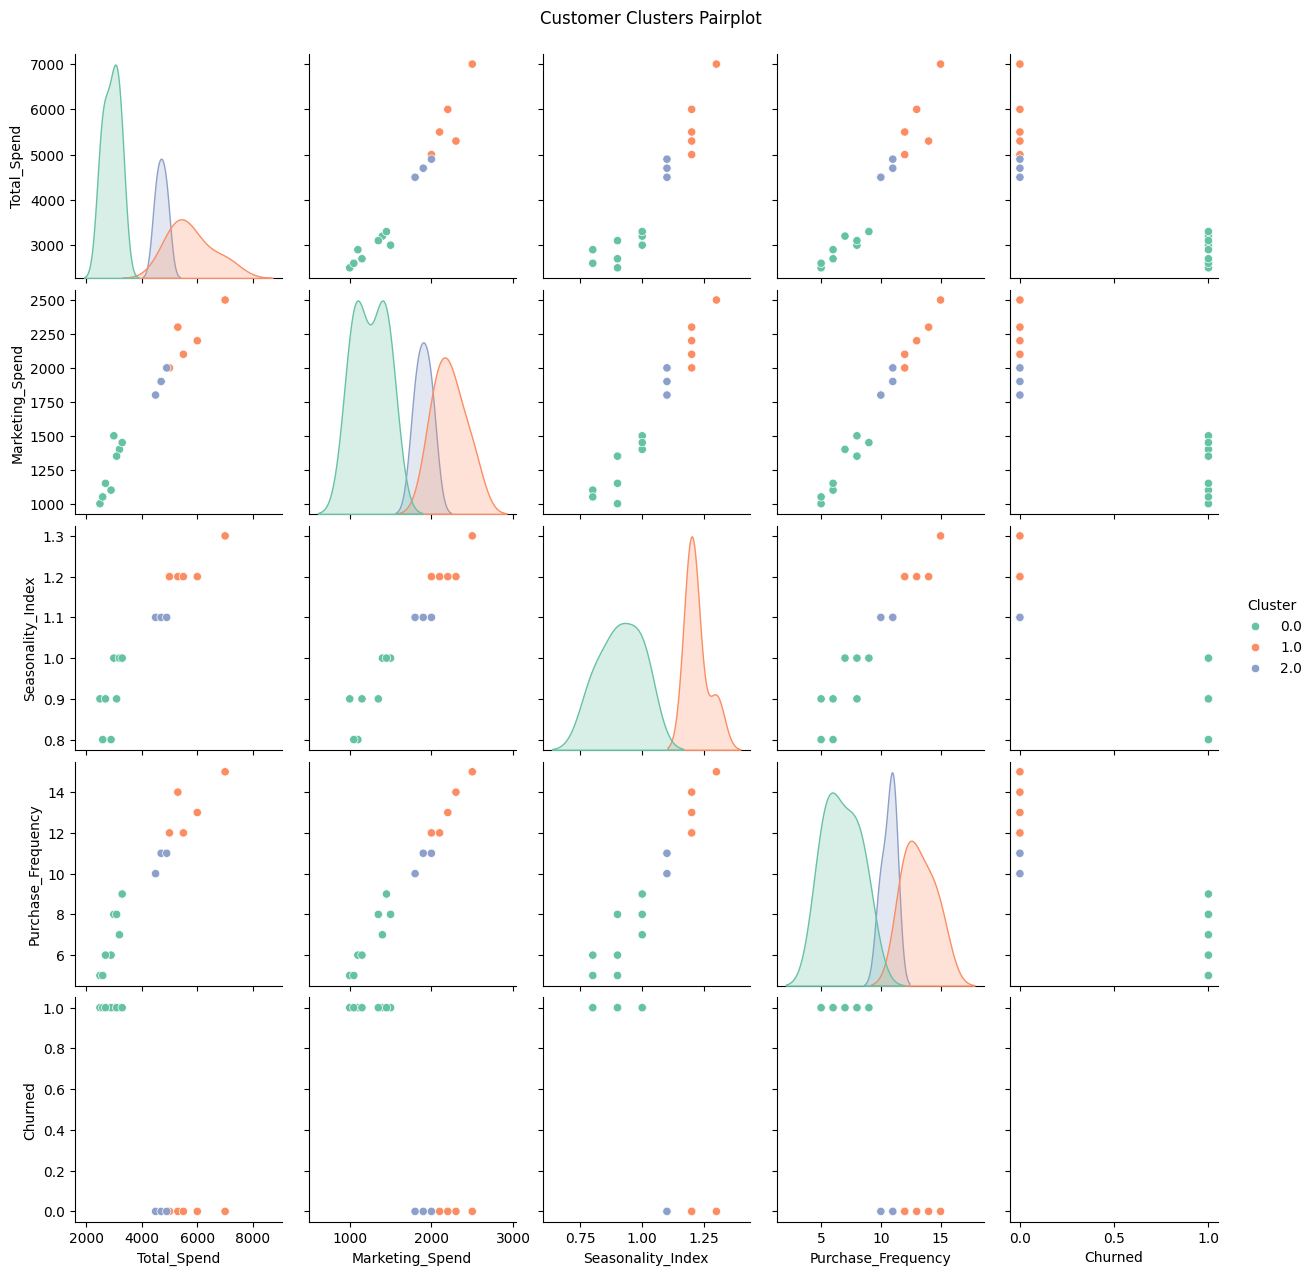

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=features, hue='Cluster', palette='Set2')
plt.suptitle('Customer Clusters Pairplot', y=1.02)
plt.savefig('Clustering.png')
plt.show()